# Project Progress Report
#League of Legends 2015-17 Regional Differences

League of Legends is an online game where two teams of 5 players compete to destroy the enemy base. Over 100 million play League of Legends every month. In this notebook I will investigate **regional and yearly differences in stats**. 

*Warning: there are many violin plots in this notebook! They are good for comparing distributions.*

### Highlights:

1) Data reflects a shift away from an ADC-heavy meta from 2014 to 2016:

* Proportion of gold given to ADCs (and Mids) steadily decreases from 2015-2017. More gold has gone to Junglers and Supports.
* Number of kills per game decreased steadily from 2014-16 before increasing slightly in 2017.

*An ADC is an Attack Damage Carry, i.e. a single player on a team that deals a lot of attack damage.*

### Outline:

I plan to split this notebook into these sections when I am somewhat finished with my analysis. (Each item compares the stat across regions unless otherwise stated.)

 **1) Gold**

- Gold differences
- Gold for winning team
- Gold per minute for winning team
- Proportion of gold given to ADC in 2015
- Proportion of gold given to ADC compared across years

**2) Game Length**

**3) Kills**

- Total kills
- Kills by winning team 

## 0. Setup and importing data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


There are 7 files in this dataset.

* `_Columns.csv` explains column labels.
* `_LeagueofLegends.csv` is the remaining 5 CSVs joined on `MatchHistory` (an URL).

In [2]:
# Load data
df = pd.read_csv('_LeagueofLegends.csv')
# df.head()

In [ ]:
# print("# Columns:")
# print(df.dtypes)

In [4]:
print("Number of matches in dataset: ", len(df))

print("\n# Matches per region")
print(df['League'].value_counts())

print("\n# Matches per year")
print(df['Year'].value_counts())

Number of matches in dataset:  3802

# Matches per region
LCK                          1101
North_America                 855
Europe                        754
LMS                           540
Season_World_Championship     228
CBLOL                         213
Mid-Season_Invitational       111
Name: League, dtype: int64

# Matches per year
2016    1659
2015    1165
2017     900
2014      78
Name: Year, dtype: int64


Region Key:

* LCK: Korea
* LMS: Taiwan, Hong Kong and Macau
* CBLOL: Brazil
* Mid-Season_Invitational and Season_World_Championship: International (all regions)

## 1. Gold

*Definitions*

**Gold** is used to buy items in the game that can make your champion more powerful or give them special abilities.

**Gold difference** is the difference between the blue team and the red team's gold. It can be calculated at any point in the game (e.g. at 20 minutes). Here the figure used is the gold difference at the end of the game `golddiff_final`.

The **blue team** starts at the bottom left hand side of the map, whereas the **red team** starts at the top right. The blue team also gets to pick and ban their a champion (the character players play) first.

### 1.1 Gold differences

In [5]:
# Create final gold count column
df['goldblue_final'] = pd.Series(df['goldblue'].apply(lambda x: int(x[1:-1].split(", ")[-1])))
df['goldred_final'] = pd.Series(df['goldred'].apply(lambda x: int(x[1:-1].split(", ")[-1])))
df['golddiff_final'] = pd.Series(df['golddiff'].apply(lambda x: int(x[1:-1].split(", ")[-1])))

# Gold per minute
df['bGoldpm'] = df['goldblue_final'] / df['gamelength']
df['rGoldpm'] = df['goldred_final'] / df['gamelength']

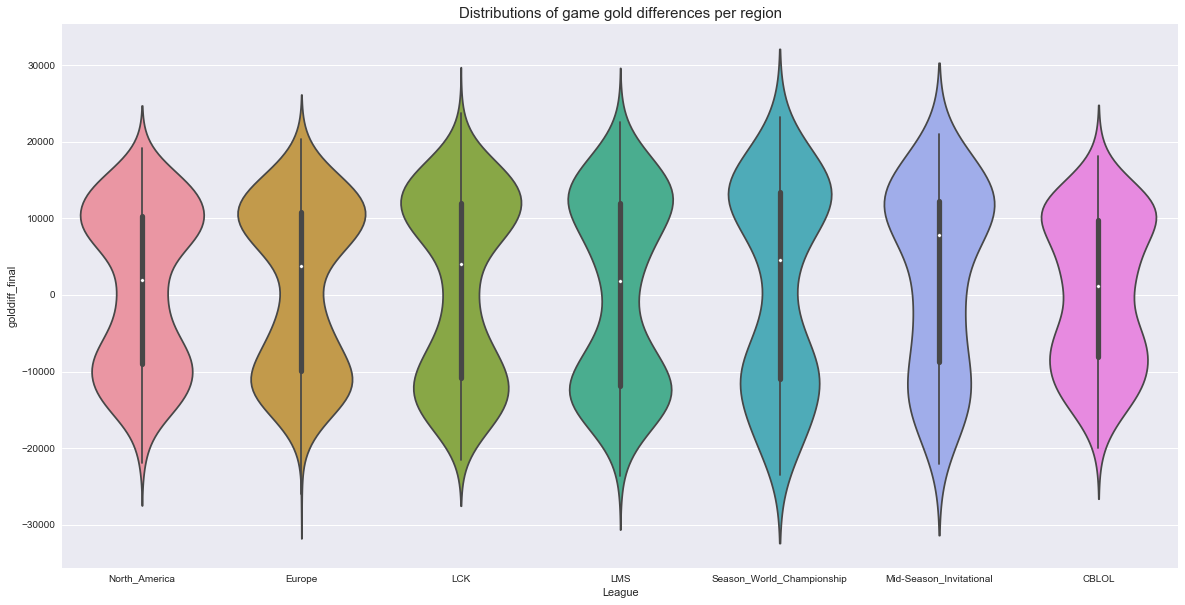

In [6]:
# Plot distribution of gold differences per region

plt.figure(figsize=(20,10))
plt.title("Distributions of game gold differences per region", fontsize=15)
sns.violinplot(x='League', y='golddiff_final', data=df)
plt.show()

It seems that the **LCK and LMS have systematically higher mean gold differences (between winning and losing teams) than NA, EU and CBLOL**. CBLOL also seems to have slightly lower mean gold differences than NA and EU for red side wins. The **mean gold differences at internationals is higher** than that of LCK or the LMS. Might there be a correlation between mean team quality and gold differences per game?

Notably, the mean gold difference (between blue and red) is positive and seems to be around 4000 for the EU, LCK and Worlds.

In [7]:
# More precise statistics
print("# Mean gold difference (between blue and red teams):\n")

na_rwin_mean_golddiff = df[df['League'] == 'North_America'][df['rResult'] == 1]['golddiff_final'].mean()
na_bwin_mean_golddiff = df[df['League'] == 'North_America'][df['rResult'] == 0]['golddiff_final'].mean()

print("NA: ")
print("Blue win: ", na_bwin_mean_golddiff)
print("Red win: ", na_rwin_mean_golddiff)

lck_rwin_mean_golddiff = df[df['League'] == 'LCK'][df['rResult'] == 1]['golddiff_final'].mean()
lck_bwin_mean_golddiff = df[df['League'] == 'LCK'][df['rResult'] == 0]['golddiff_final'].mean()

print("\nLCK: ")
print("Blue win: ", lck_bwin_mean_golddiff)
print("Red win: ", lck_rwin_mean_golddiff)

# Mean gold difference (between blue and red teams):

NA: 
Blue win:  9517.602591792656
Red win:  -9299.538265306122

LCK: 
Blue win:  11039.602965403625
Red win:  -11058.72064777328


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


### 1.2 Gold for winning team

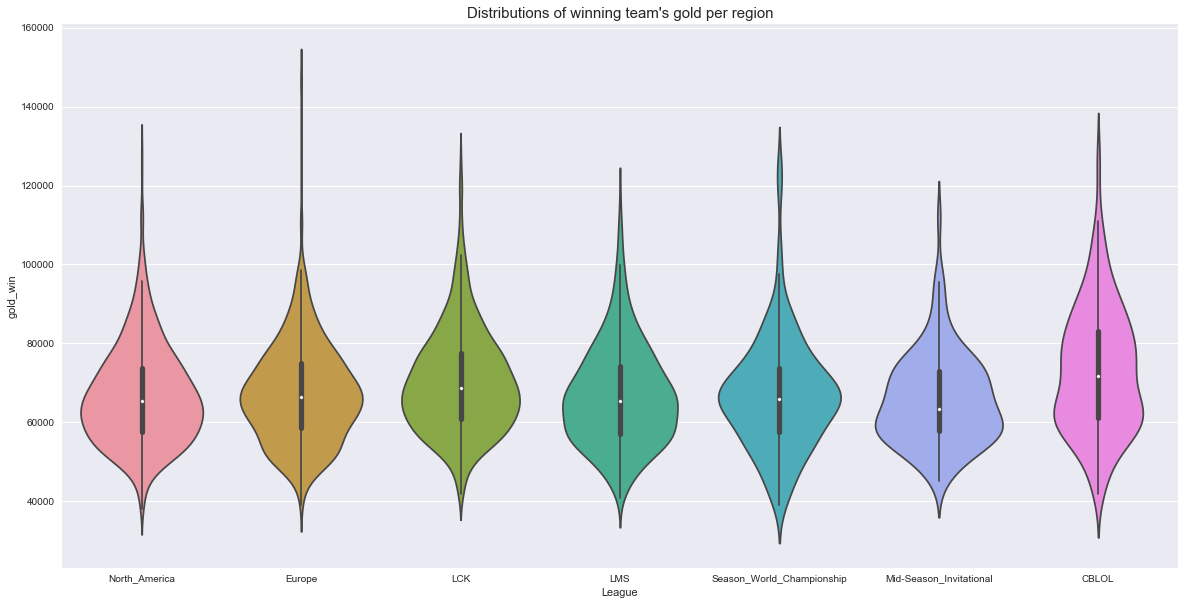

In [8]:
# Calculate gold gained by winning team
df['gold_win'] = df['goldblue_final']*df['bResult'] + df['goldred_final']*df['rResult']

# Plot distribution of gold gained by winning team per region
plt.figure(figsize=(20,10))
plt.title("Distributions of winning team's gold per region", fontsize=15)
sns.violinplot(x='League', y='gold_win', data=df)
plt.show()

This doesn't seem too informative.

### 1.3 Gold per minute (for winning team)

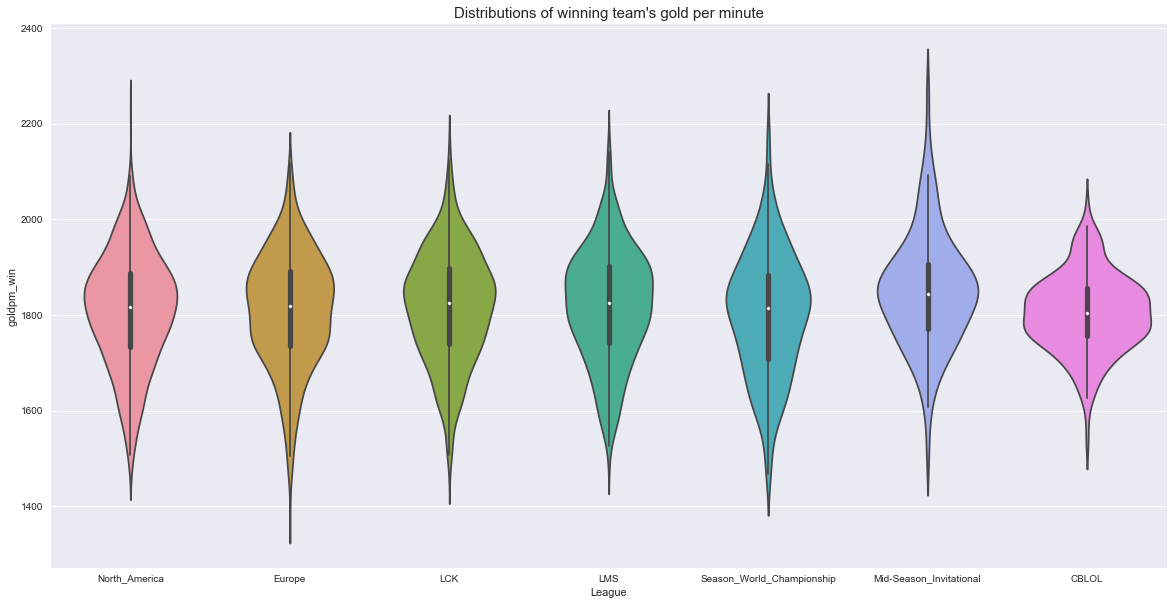

In [9]:
# Calculate gold per minute
df['goldpm_win'] = df['bGoldpm']*df['bResult'] + df['rGoldpm']*df['rResult']

# Plot distribution of winning team's gold per minute per region
plt.figure(figsize=(20,10))
plt.title("Distributions of winning team's gold per minute", fontsize=15)
sns.violinplot(x='League', y='goldpm_win', data=df)
plt.show()

I don't know how meaningful of a metric this is, but this seems to be pretty consistent across regions (with the exception of CBLOL, where the winning team's gold per minute is much more clustered around a slightly lower mean).

### 1.4 Proportion of gold given to ADC
*Definitions*

An **ADC** is an Attack Damage Carry. Each professional team has one designated ADC player. They typically choose champions that deal a lot of attack damage.

In [10]:
# Extract final ADC gold amount per team per game
df['goldblueADC_final'] = pd.Series(df['goldblueADC'].apply(lambda x: int(x[1:-1].split(", ")[-1])))
df['goldredADC_final'] = pd.Series(df['goldredADC'].apply(lambda x: int(x[1:-1].split(", ")[-1])))

# Calculate ADC's gold share 
df['bADCgoldshare'] = df['goldblueADC_final'] / df['goldblue_final']
df['rADCgoldshare'] = df['goldredADC_final'] / df['goldred_final']
df['meanADCgoldshare'] = 0.5*(df['bADCgoldshare'] + df['rADCgoldshare'])

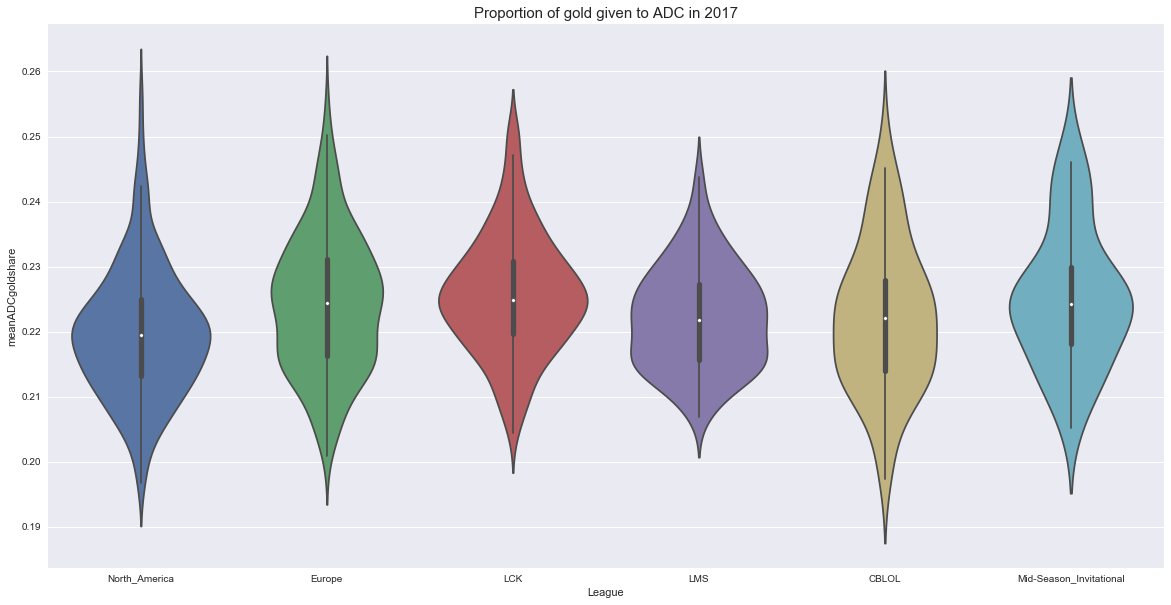

In [11]:
# Plot ADC's gold share per region
plt.figure(figsize=(20,10))
plt.title("Proportion of gold given to ADC in 2017", fontsize=15)
sns.violinplot(x='League', y='meanADCgoldshare', data=df[df['Year'] == 2017])
plt.show()

So far in 2017, ADCs' gold share in the highest in the LCK, where it is over 1% higher than in North America. EU's is the second highest, followed by LMS, CBLOL and then NA.

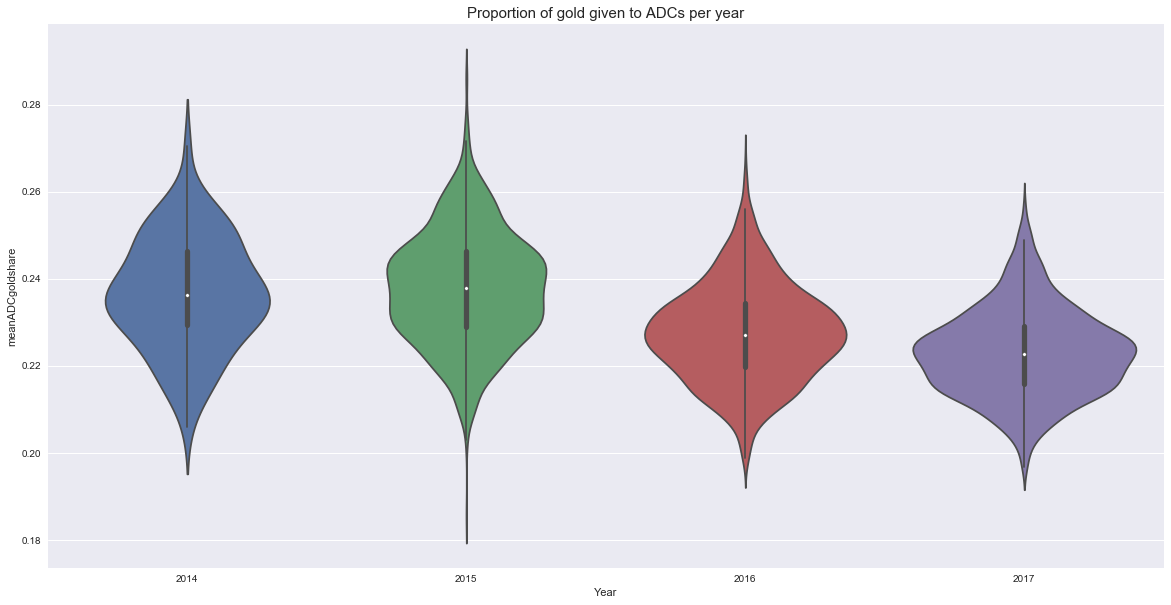

In [12]:
# Plot ADC's gold share per year
plt.figure(figsize=(20,10))
plt.title("Proportion of gold given to ADCs per year", fontsize=15)
sns.violinplot(x='Year', y='meanADCgoldshare', data=df)
plt.show()

Now this is interesting - you can see the **shift from an ADC-heavy meta to one that is less ADC-heavy**.  The mean proportion of gold given to ADCs decreases steadily from 2015 to 2017, with the mean share decreasing by nearly 2%.

The question is - **where did the gold go?**

In [13]:
# Bazinga! Everyone's here!
role_list = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
region_list = ['LCK', 'North_America', 'Europe', 'LMS', 'CBLOL', 'Season_World_Championship', 'Mid-Season_Invitational']
for role in role_list:
    # Extract final [role] gold amount per team per game
    df['goldblue' + role + '_final'] = pd.Series(df['goldblue' + role].apply(lambda x: int(x[1:-1].split(", ")[-1])))
    df['goldred' + role + '_final'] = pd.Series(df['goldred' + role].apply(lambda x: int(x[1:-1].split(", ")[-1])))
    
    # Calculate [role]'s gold share 
    df['b' + role + 'goldshare'] = df['goldblue' + role + '_final'] / df['goldblue_final']
    df['r' + role + 'goldshare'] = df['goldred' + role + '_final'] / df['goldred_final']
    df['mean' + role + 'goldshare'] = 0.5*(df['b' + role + 'goldshare'] + df['r' + role + 'goldshare'])
    df['meanmean' + role + 'goldshare'] = None
    
    for year in range(2015, 2018):
        for region in region_list:
            spec_mean = df[(df['Year'] == year) & (df['League'] == region)]['mean' + role + 'goldshare'].mean()
            if np.isnan(spec_mean):
                spec_mean = None
            df.loc[(df['Year'] == year) & (df['League'] == region), 'meanmean' + role + 'goldshare'] = spec_mean
        # ymean may not be necessary
        ymean = df[df['Year'] == year]['mean' + role + 'goldshare'].mean()
        df.loc[(df['Year'] == year), 'ymeanmean' + role + 'goldshare'] = ymean

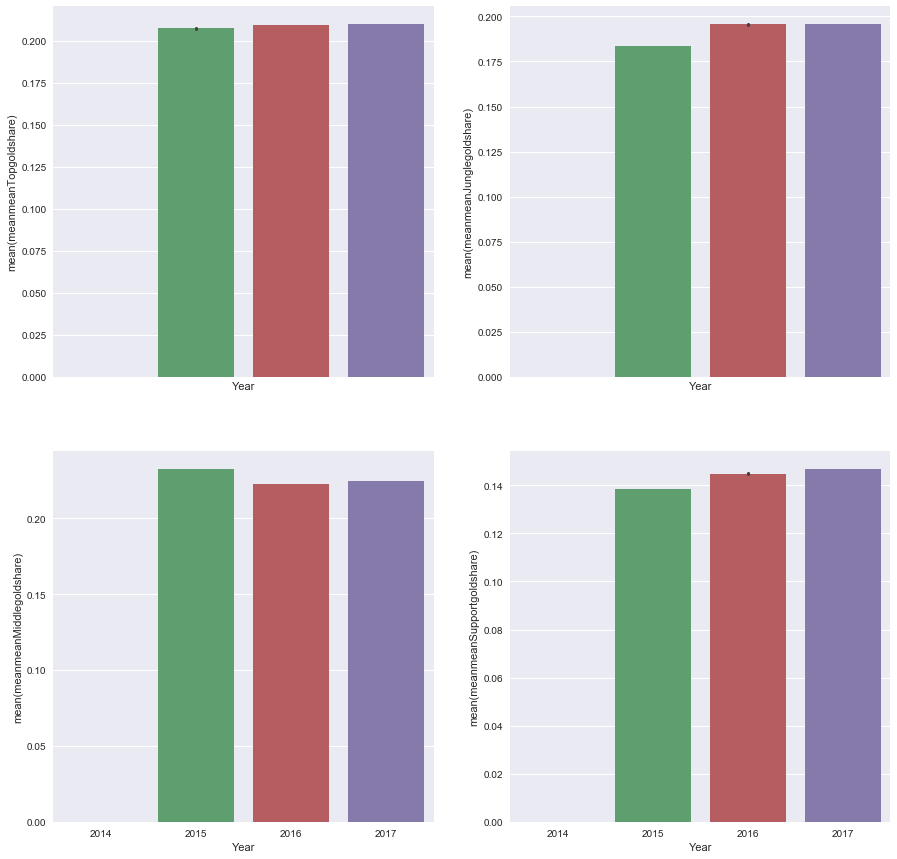

In [14]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)
# sns.despine(left=True)

sns.barplot(x="Year", y='meanmeanTopgoldshare', data=df, ax=axes[0, 0])
sns.barplot(x="Year", y='meanmeanJunglegoldshare', data=df, ax=axes[0, 1])
sns.barplot(x="Year", y='meanmeanMiddlegoldshare', data=df, ax=axes[1, 0])
sns.barplot(x="Year", y='meanmeanSupportgoldshare', data=df, ax=axes[1, 1])

Looks like we've got our answer - **the gold has gone to Junglers and Supports**. Notice that the Mid player's gold share has also gone down since 2015.

## 2. Game length

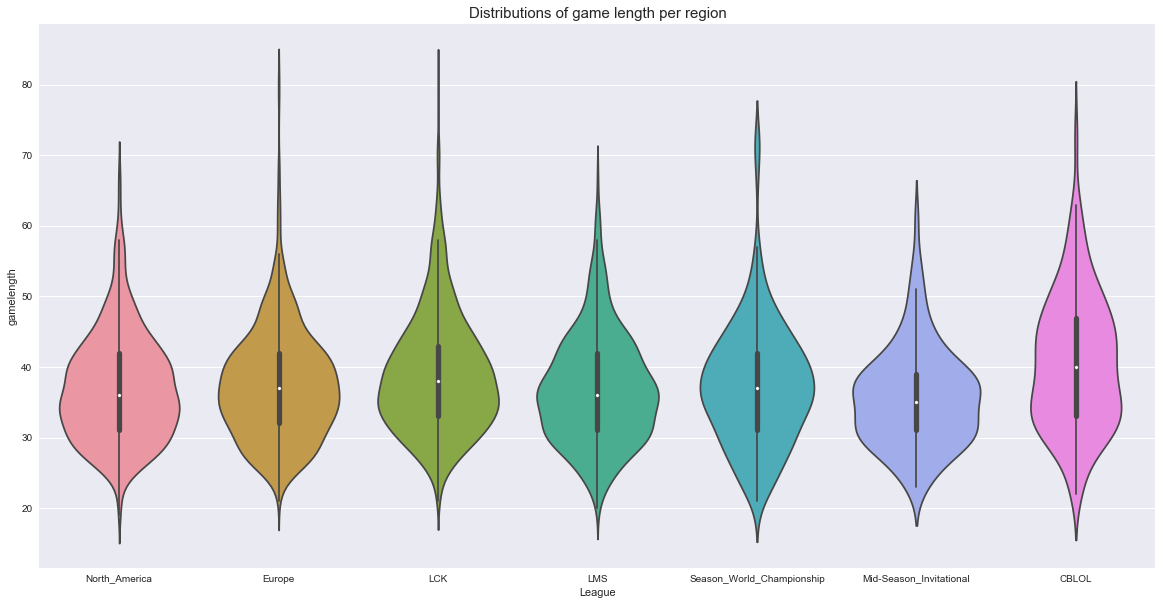

In [15]:
# Plot distribution of game length per region
plt.figure(figsize=(20,10))
plt.title("Distributions of game length per region", fontsize=15)
sns.violinplot(x='League', y='gamelength', data=df)
plt.show()

## 3. Kills

In [16]:
# Calculate number of kills per team per game
df['rNumKills'] = pd.Series(df['rKills'].apply(lambda x: len(x[2:-2].split("], ["))))
df['bNumKills'] = pd.Series(df['bKills'].apply(lambda x: len(x[2:-2].split("], ["))))

# Calculate total number of kills across both teams per game
df['total_kills'] = df['rNumKills'] + df['bNumKills']

# Calculate number of kills by winning team per game
df['win_kills'] = df['rNumKills']*df['rResult'] + df['bNumKills']*df['bResult']

### 3.1 Kills per game

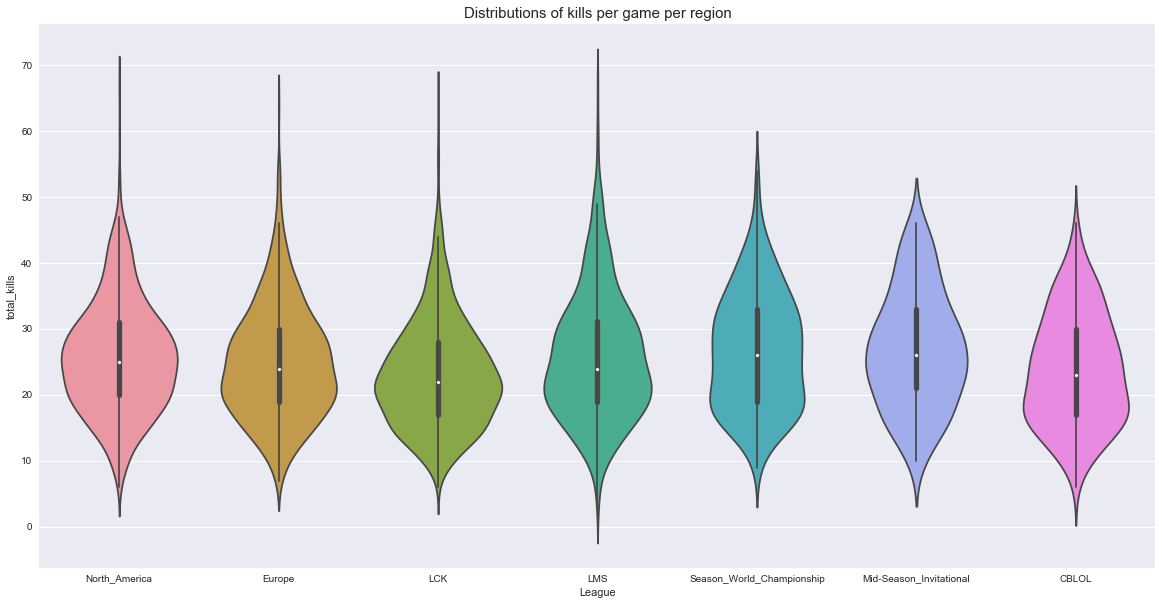

In [17]:
# Plot distribution of kills per game per region
plt.figure(figsize=(20,10))
plt.title("Distributions of kills per game per region", fontsize=15)
sns.violinplot(x='League', y='total_kills', data=df)
plt.show()

1. The **mean number of kills per match is higher at internationals that it is in regionals**. This may be because teams are 'better' on average, because matches are more chaotic (as different regions may have different playstyles) or because teams are more aggressive (because stakes are higher).
2. The **mean number of kills is lowest in the LCK**. NA is the highest, followed by EU, then CBLOL, then LCK. Recall that the mean **game length was highest in the LCK**, so this may reflect a different playstyle or fewer mistakes made.

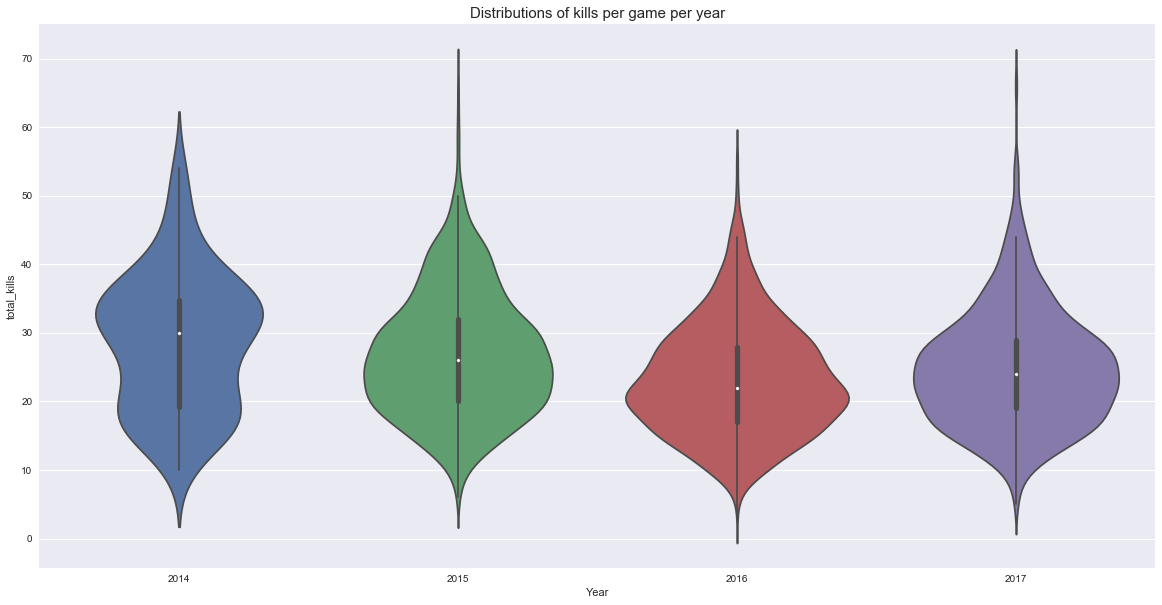

In [18]:
# Plot distribution of kills per game per year
plt.figure(figsize=(20,10))
plt.title("Distributions of kills per game per year", fontsize=15)
sns.violinplot(x='Year', y='total_kills', data=df)
plt.show()

The **number of kills per game decreased steadily from 2014-16** before increasing slightly in 2017. This may be related to the shift away from the ADC-focused meta.

### 3.2 Kills by winning team

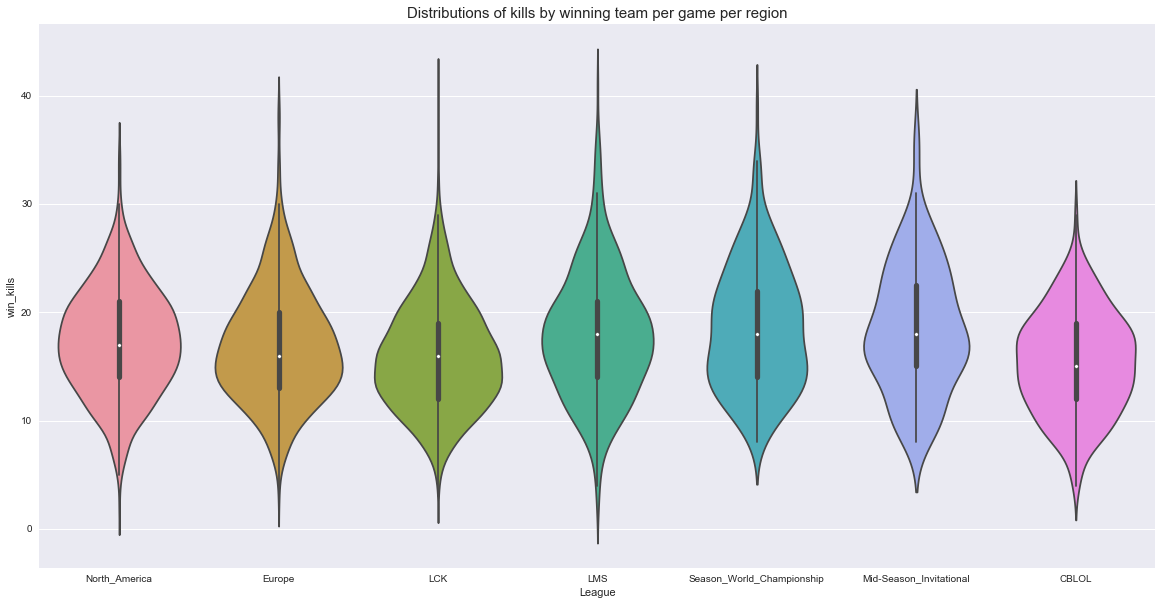

In [19]:
# Plot distribution of kills by winning team per game per region

plt.figure(figsize=(20,10))
plt.title("Distributions of kills by winning team per game per region", fontsize=15)
sns.violinplot(x='League', y='win_kills', data=df)
plt.show()

In [20]:
# Plot mean kills per year per region as a bar chart


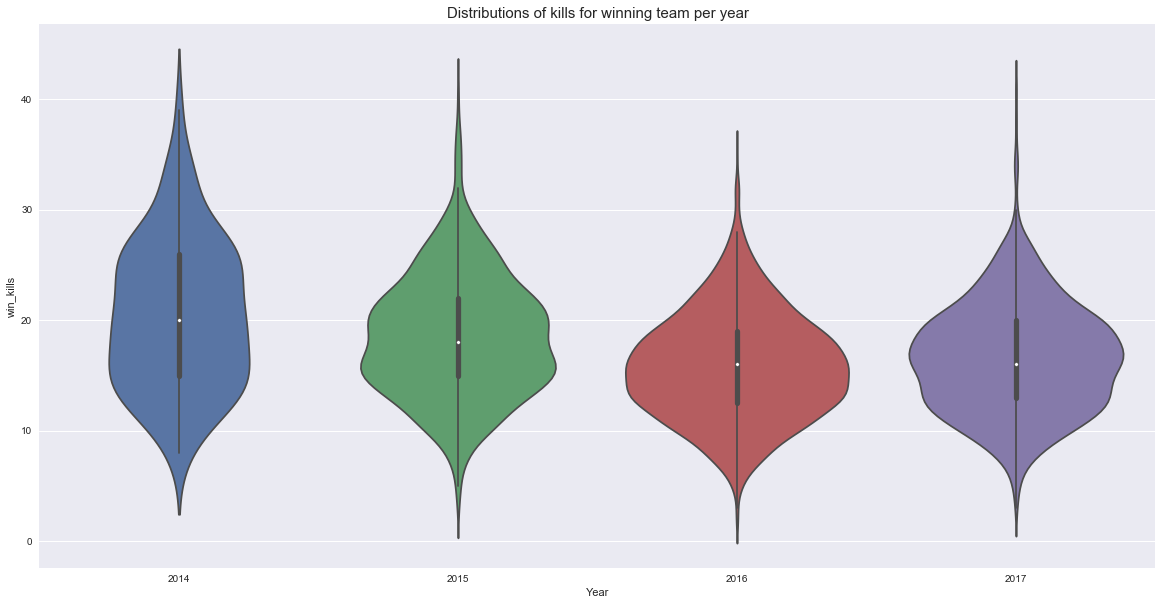

In [21]:
# Plot distribution of kills by winning team per game per year
plt.figure(figsize=(20,10))
plt.title("Distributions of kills for winning team per year", fontsize=15)
sns.violinplot(x='Year', y='win_kills', data=df)
plt.show()

As with the total number of kills per game, the **number of kills by the winning team decreased steadily from 2014-16** before holding steady or increasing slightly in 2017. Again, this may be related to the shift away from the ADC-focused meta.

## Appendix

In [23]:
lck = df[df['League'] == 'LCK']
na = df[df['League'] == 'North_America']
eu = df[df['League'] == 'Europe']
lms = df[df['League'] == 'LMS']
worlds = df[df['League'] == 'Season_World_Championship']
cblol = df[df['League'] == 'CBLOL']
msi = df[df['League'] == 'MSI']